In [1]:
import os
import numpy as np
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Create a word-document matrix (A) from a text dataset. If the vocabulary (set of unique words) size is M and the number of documents is N, then the size of this matrix will be M X N. Use numpy data structures to create and manipulate this matrix.
1. Show the matrix A: report M and N

In [2]:
# Path to the folder containing your text files
folder_path = "C:\\Users\mansi\Downloads\Assignment1_data"

text_data = []

# Loop through each text file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        # Read the text file
        with open(os.path.join(folder_path, filename), 'r', encoding='latin-1') as file:
            #print(file)
            text = file.read()
            #print(text)
        
        # text preprocessing
        tokens = text.split()  # Split by whitespace
        
        # applying lowercasing, removing punctuation, etc.
        tokens = [token.lower().translate(str.maketrans('', '', string.punctuation)) for token in tokens]
        
        preprocessed_text = ' '.join(tokens)

        text_data.append(preprocessed_text)

In [3]:
# CountVectorizer to build the word-document matrix A
vectorizer = CountVectorizer(lowercase=True)
X = vectorizer.fit_transform(text_data)

# Matrix A
A = X.toarray()
A = np.transpose(A)

# Extract vocabulary/unique word from the CountVectorizer
vocabulary = vectorizer.get_feature_names_out()

#for word in vocabulary:
#    print(word)

M, N = A.shape  # M is the vocabulary size, N is the no. of documents
print(f"Matrix A (MxN): {M}x{N}")
print("\nVocabulary (set of unique words):", vocabulary)

Matrix A (MxN): 1162x20

Vocabulary (set of unique words): ['10' '100000' '10year' ... 'young' 'your' 'yuan']


2. Visualize the matrix: Use heatmap like visualization to display the word-document matrix (higher frequency should be denoted by a darker shade)

C:\Users\mansi\AppData\Local\Temp\ipykernel_2140\2925749754.py:14: RuntimeWarning: invalid value encountered in log
  heatmap_data = np.log(A_matrix_pca)


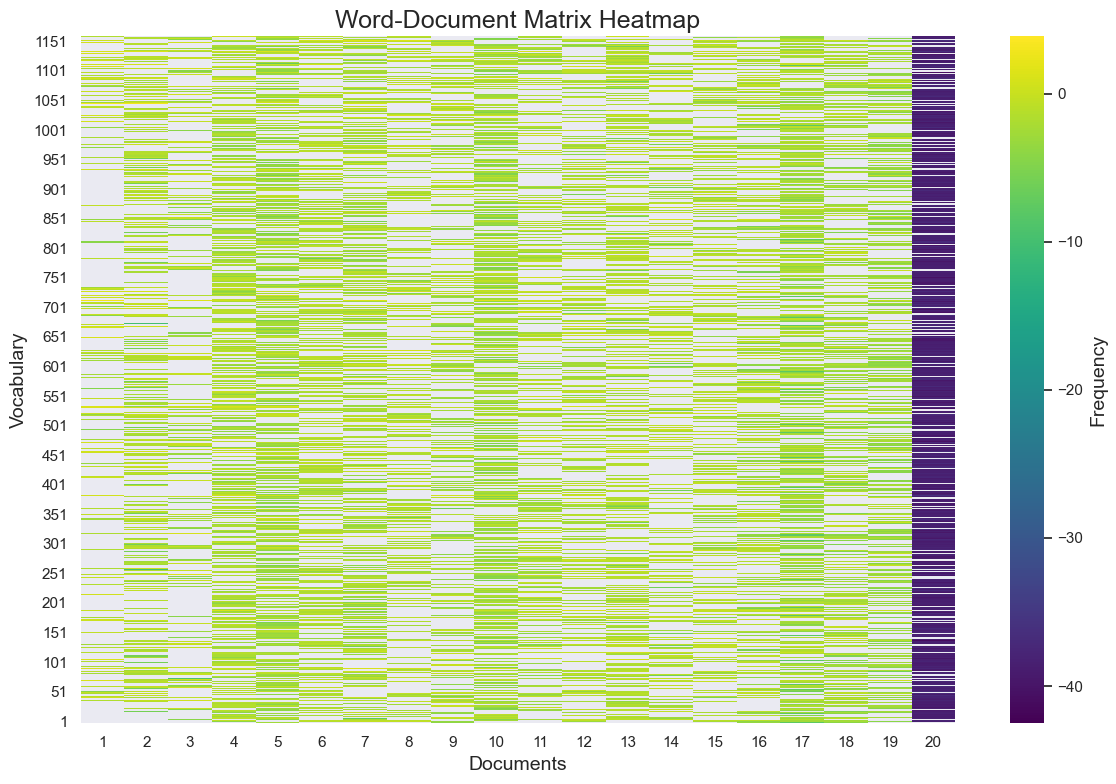

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Current matrix A has 1162 rows having many 0 values; 
# So, applying PCA to reduce dimensionality for better visualization
pca = PCA(n_components=20)
A_matrix_pca = pca.fit_transform(A)

# Replace zero values with a small non-zero value to avoid issues with log scaling
A_matrix_pca[A_matrix_pca == 0] = 1e-10

# Take the logarithm of the values to better visualize frequency differences
heatmap_data = np.log(A_matrix_pca)

# create heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
ax = sns.heatmap(heatmap_data, cmap="viridis")

# Set axis and labels
ax.set_xticklabels(np.arange(1, 21, 1))  # Start from 1
ax.set_yticks(np.arange(1, A.shape[0] + 1, 50))
ax.set_yticklabels(range(1, A.shape[0] + 1, 50))
ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Frequency', fontsize=14)

ax.set_title("Word-Document Matrix Heatmap", fontsize=18)
ax.set_xlabel("Documents", fontsize=14)
ax.set_ylabel("Vocabulary", fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


3. Using the matrix compute TF-IDF scores for each word

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# TfidfVectorizer to compute TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

# Access TF-IDF scores
tfidf_scores = tfidf_matrix.toarray()
features=tfidf_vectorizer.get_feature_names_out()
tfidf_df=pd.DataFrame(data=tfidf_scores,columns=features)
tfidf_df

,10,100000,10year,14,15,150,1528,15month,17,17yearold,...,yet,yield,yields,york,yorkbased,you,youll,young,your,yuan
0,0.099636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.089091,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.184524,0.000000,0.000000,0.077547,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076695,0.000000,0.000000
6,0.000000,0.000000,0.073628,0.000000,0.064720,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073628,0.515397,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.079637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100403,0.000000,0.000000,0.000000,0.000000,0.079637,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.074671,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074108,0.000000,0.000000


4. Using cosine similarity find the 3 most similar documents of "10.txt"

In [6]:
# Compute cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Get the list of text file names in the folder
file_names = [filename for filename in os.listdir(folder_path) if filename.endswith(".txt")]

# Find the most similar documents to "10.txt"
document_index = 9
if document_index < len(file_names):
    file_name_at_index_9 = file_names[document_index]
    print("File name at document_index 9:", file_name_at_index_9)
else:
    print("Document_index is out of range.")

similarities = cosine_similarities[document_index]
most_similar_indices = np.argsort(similarities)[-4:-1]  # Exclude "10.txt" itself
most_similar_documents = [f"{i}.txt" for i in most_similar_indices]
print("\nMost similar documents to '10.txt':", most_similar_documents)

File name at document_index 9: 10.txt

Most similar documents to '10.txt': ['1.txt', '15.txt', '5.txt']


5. Using matrix manipulation and numpy create a new matrix B of size N X N, where Bij will represent the number of common words between document i and j. Note: the diagonal of B should always have the highest value

In [7]:
# Initialize the result matrix B
B = np.zeros((N, N), dtype=int)

# Using Set & Intersection method to calculate common words between document i and j
for i in range(N):
    for j in range(N):
        i_words = set(text_data[i].lower().split())
        j_words = set(text_data[j].lower().split())
        
        common_word_count = len(i_words.intersection(j_words))
        B[i][j] = common_word_count

print(B.shape)
print(B)

print("\n\n Diagonal of matrix B: \n")
np.diagonal(B)

(20, 20)
[[ 64  13  14  14  15  16  15  14  18  10  12  12   9  21  11  16   8  14
   13  14]
 [ 13  93  21  16  23  25  17  20  12  22  16  13  15  16  17  17  12  21
   93  18]
 [ 14  21  88  12  17  17  18  19   8  15  15  12  15  19  12  17  10  16
   21  17]
 [ 14  16  12  93  19  15  13  17  14  13  17  14  17  21  13  12  12  20
   16  15]
 [ 15  23  17  19 109  23  18  23  11  16  18  19  16  20  19  18  11  26
   23  20]
 [ 16  25  17  15  23 109  17  16  13  38  18  16  14  19  14  17  14  21
   25  20]
 [ 15  17  18  13  18  17 112  23  13  16  14  21  23  22  15  17  10  20
   17  21]
 [ 14  20  19  17  23  16  23  99  16  14  20  12  18  21  22  16  12  30
   20  23]
 [ 18  12   8  14  11  13  13  16  92  14  13  11  15  19  20  12  12  14
   12  14]
 [ 10  22  15  13  16  38  16  14  14  97  18  15  14  18  13  18  11  16
   22  19]
 [ 12  16  15  17  18  18  14  20  13  18  79  14  16  21  18  16  10  18
   16  18]
 [ 12  13  12  14  19  16  21  12  11  15  14  90  16  2

array([ 64,  93,  88,  93, 109, 109, 112,  99,  92,  97,  79,  90, 101,
       136, 121,  81,  87, 150,  93, 109])

In [8]:
# Check the diagonal of B if it has the highest value

diagonal_max_row = np.max(B, axis=1)
diagonal_max_col = np.max(B, axis=0)

# Check if the diagonal elements are greater than the maximum values in their respective rows and columns
is_diagonal_highest_in_row = np.all(B.diagonal() >= diagonal_max_row)
is_diagonal_highest_in_col = np.all(B.diagonal() >= diagonal_max_col)

if is_diagonal_highest_in_row and is_diagonal_highest_in_col:
    print("The diagonal has the highest values both in rows and columns.")
elif is_diagonal_highest_in_row:
    print("The diagonal has the highest values in rows.")
elif is_diagonal_highest_in_col:
    print("The diagonal has the highest values in columns.")
else:
    print("The diagonal does not have the highest values in rows or columns.")

The diagonal has the highest values both in rows and columns.
